<a id='main'></a>
### Functions
[functions](#functions)

### Plots:

[base scencario](#base) 

[close all after one week](#close_all_336) 

[school time separation](#school_times) 

[age dependent interaction modifier Gangelt](#age_dep_IM_G) respective age group's interaction modifier is multiplied by 1.2  others are decreased to remain a mean of 1.0

[age dependent interaction modifier Bad Feilnbach](#age_dep_IM_FB) respective age group's interaction modifier is multiplied by 1.2  others are decreased to remain a mean of 1.0

[homogeneous mixing](#HM)

[recovered ordered 1](#rw0o1)

[recover from previous infection](#rw1)

In [1]:
import os
os.chdir('../') # important if this notebook is not in main but in notebooks folder

import gerda.utilities.VPM_plotting as vpm_plot
import sim_parallel.get_status_data_and_plots_from_parallel as plt_para
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np

from gerda.core.virusPropagationModel import *
from gerda.utilities.VPM_plotting_parallel import *
from functools import partial

%matplotlib inline


<a id='data_folders'></a>
### Data &  Folders 

In [2]:
#pd.read_excel('/Users/bjorngoldenbogen/Google Drive/Simulations GERDA.gsheet')

In [3]:
server_data_folder_str = '/Volumes/Samsung_T5/corona_simulations/simulation_results_20201028/'
scenarios_list = os.listdir(server_data_folder_str)
scenarios_list.sort()
scenarios_list

['._plot_summary_all_scenarios.pptx',
 'LockDownLight',
 'additional_locations',
 'base_scenario',
 'base_scenario_inf_0.15',
 'close_all_336',
 'close_public_home_office_scan_0.2_0.9',
 'close_public_inf_0.15',
 'compliance_scan_0.00_0.45',
 'disobedience_scan_0.00_0.45',
 'fixed_base_scenario',
 'fixed_recover_age_scan_0.1_0.9',
 'fixed_recover_age_scan_part_imnty_0.1_sus_0.1_0.9',
 'fixed_recover_age_scan_part_imnty_inf_0.1_0.9',
 'fixed_recover_age_scan_part_imnty_sus_0.1_0.9',
 'fixed_recover_ageinteractions_scan_0.1_0.9',
 'fixed_recover_from_world_scan_0.1_0.9',
 'fixed_recover_household_scan_0.1_0.9',
 'fixed_recover_households_scan_0.1_0.9',
 'fixed_recover_interactions_scan_0.1_0.9',
 'fixed_recover_interactions_scan_part_imnty_0.1_sus_0.1_0.9',
 'fixed_recover_overrepresentation_scan_0.1_0.9',
 'fixed_recover_random_scan_0.1_0.9',
 'fixed_timecourses_for_network',
 'incidence_scan_LockDownLight',
 'incidence_scan_LockDownLight_2',
 'incidence_scan_control',
 'incidence_scan_

In [4]:
server_data_folder = 'server_data/V2_RPM02_Gangelt/'
filenames = os.listdir(server_data_folder)

sc_names={
        'IAR_1.2_25.0_49.0_parralel_HM_V2_Bad_Feilnbach_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0':'BF_IAR_1.2_25.0_49.0',
        'parralel_HM_V2_RPM02_hm_Gangelt_big_no_mitigation_IF03_prod_0.6_inf_0.075_None_ 1.000_ri_1_rx_0':'inf_0.075',
        'IAR_1.2_75.0_99.0_parralel_HM_V2_Bad_Feilnbach_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0':'BF_IAR_1.2_75.0_99.0',
        'mix_parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0':'MIX_Baseline',
        'mix_parralel_HM_V2_RPM02_hm_Gangelt_big_no_mitigation_IF03_prod_0.6_inf_1.2_mu_0.500_ri_1_rx_0':'MIX_inf_1.2',
        'parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0':'Baseline',
        'IAR_1.2_0.0_24.0_parralel_HM_V2_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0':'IAR_1.2_0.0_24.0',
        'IAR_1.2_25.0_49.0_parralel_HM_V2_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0':'IAR_1.2_25.0_49.0',
        'parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_close_all_reopen_all_IF03_start_3_672.000_ri_1_rx_0':'reopen_all_672',
        'parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_close_all_reopen_all_IF03_None_1.000_ri_1_rx_0':'close_all_2_weeks',
        'parralel_HM_V2_RPM02_hm_Gangelt_big_no_mitigation_IF03_prod_0.6_inf_1.2_mu_0.500_ri_1_rx_0':'inf_1.2',
        'parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_close_all_reopen_all_IF03_start_3_1008.000_ri_1_rx_0':'reopen_all_1008',
        'IAR_1.2_50.0_74.0_parralel_HM_V2_Bad_Feilnbach_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0':'BF_IAR_1.2_50.0_74.0',
        'IAR_1.2_75.0_99.0_parralel_HM_V2_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0':'IAR_1.2_75.0_99.0',
        'IAR_1.2_50.0_74.0_parralel_HM_V2_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0':'IAR_1.2_50.0_74.0',
        'IAR_1.2_0.0_24.0_parralel_HM_V2_Bad_Feilnbach_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0':'BF_IAR_1.2_0.0_24.0',
        'parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_close_all_IF03_None_1.000_ri_1_rx_0':'close_all_1344',
        'IAR_1.2_26.0_49.0_parralel_HM_V2_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0':'IAR_1.2_26.0_49.0'
        }

BF_IARS = [x for x in sc_names.values() if x.startswith('BF_IAR')]
IARS = [x for x in sc_names.values() if x.startswith('IAR')]
MIX = [x for x in sc_names.values() if x.startswith('MIX')]
INF = [x for x in sc_names.values() if x.startswith('inf')]
REST = [x for x in sc_names.values() if x not in BF_IARS+IARS+MIX+INF]
inv_sc_names = {v: k for k, v in sc_names.items()}
IARS.sort(),BF_IARS.sort(),MIX.sort(),INF.sort(),REST.sort()

FileNotFoundError: [Errno 2] No such file or directory: 'server_data/V2_RPM02_Gangelt/'

<a id='functions'></a>
### Functions 
[back to top](#main)

In [2]:
def assign_types(agent_id_type_dict, location_id_type_dict, df):#
    df.sort_values(by='time',inplace=True)
    df['loc_type'] = df['infection_loc_ID'].map(location_id_type_dict)
    df['agent_type'] = df['infected_by_ID'].map(agent_id_type_dict)
    return(df)

def get_delta_ds(ds1,ds2, relative=False):
    if relative:
        return(-ds2.add(-ds1, fill_value=0)/ds2)
    else:
        return(-ds2.add(-ds1, fill_value=0))#(ds1-ds2) 
    
def get_ID_Type_dicts(scenario, server_data_folder): #
    
    try:
        df_ai = pd.read_csv(server_data_folder+scenario+'/'+scenario[:-10]+'_agent_infos.csv')
        df_li = pd.read_csv(server_data_folder+scenario+'/'+scenario[:-10]+'_location_infos.csv')
    except:
        df_ai = pd.read_csv(server_data_folder+scenario+'/IAR_1_0_99_'+scenario[:-10]+'_agent_infos.csv')
        df_li = pd.read_csv(server_data_folder+scenario+'/IAR_1_0_99_'+scenario[:-10]+'_location_infos.csv')
        
    agent_id_type_dict = dict(zip(df_ai['ID'].values,df_ai['Type'].values))
    location_id_type_dict = dict(zip(df_li['ID'].values,df_li['Type'].values))
    return(agent_id_type_dict, location_id_type_dict)   

def get_df_list(scenario, server_data_folder): #
    dict_s, dict_l = get_ID_Type_dicts(scenario, server_data_folder)
    infect_info_filenames = os.listdir(server_data_folder+scenario+'/'+'infection_informations/')
    df_list = [pd.read_csv(server_data_folder+scenario+'/'+'infection_informations/'+x) for x in infect_info_filenames]
    mapfunc= partial(assign_types,dict_s, dict_l) #sorted for time
    return(list(map(mapfunc, df_list)), dict_s, dict_l)

def get_fractions_and_numbers_agents_locs(scenario, server_data_folder, with_mixing_loc=True):#
    try:
        df_ai = pd.read_csv(server_data_folder+scenario+'/'+scenario[:-10]+'_agent_infos.csv')
        df_li = pd.read_csv(server_data_folder+scenario+'/'+scenario[:-10]+'_location_infos.csv')
    except:
        df_ai = pd.read_csv(server_data_folder+scenario+'/IAR_1_0_99_'+scenario[:-10]+'_agent_infos.csv')
        df_li = pd.read_csv(server_data_folder+scenario+'/IAR_1_0_99_'+scenario[:-10]+'_location_infos.csv')

    df_fraction_s = df_ai.groupby('Type').count()['ID']/len(df_ai)
    df_fraction_l = df_li.groupby('Type').count()['ID']/len(df_li)
    try:
        if with_mixing_loc:
            pass
        else:
            df_fraction_l.drop(['mixing_loc'], inplace=True)
        df_fraction_l.drop(['morgue'], inplace=True)
    except:
        pass
    
    n_people =len(df_ai)
    n_locs =len(df_li)
    fraction_nr_type_dict = {
                             'agent_type':(df_fraction_s, n_people, vpm_plot.scheduleTypeColors),
                             'loc_type':(df_fraction_l, n_locs, vpm_plot.locationTypeColors),
                             }
    return(fraction_nr_type_dict) 

def sort_most_infecting_agents(dict_s, df):#
    df_group = df.groupby('infected_by_ID').count()['h_ID'].reset_index()
    df_group['type'] = df_group['infected_by_ID'].map(dict_s)
    df_group.columns = ['infected_by_ID','count','agent_type']
    df_group.sort_values('count',ascending=False,inplace=True)
    return(df_group)

#def get_df_list_most_inf_agents(scenario, server_data_folder):
#    fraction_nr_type_dict = get_fractions_and_numbers_agents_locs(scenario, server_data_folder)
#    dict_s, dict_l = get_ID_Type_dicts(scenario, server_data_folder)
#    df_list = get_df_list(scenario, server_data_folder)
    
#    mapfunc = partial(sort_most_infecting_agents, dict_s)
#    df_list_sorted = list(map(mapfunc,df_list))
#    return df_list_sorted, dict_s, dict_l

def agent_or_loc_top_infectees(dict_s, object_type, df, fraction=0.5):#
    if object_type == 'loc_type':
        infectees = list(sort_most_infecting_agents(dict_s, df)['infected_by_ID'].values)
        red_infectees = infectees[:int(fraction*len(infectees))]
        df_new = df.set_index('infected_by_ID')
        df_ratio = df_new.loc[red_infectees].groupby('loc_type').count()/len(df_new.loc[red_infectees])
        return(df_ratio['infection_loc_ID'])
    
    elif object_type == 'agent_type':
        df_most_inf = sort_most_infecting_agents(dict_s, df)
        df_ratio = df_most_inf[:int(fraction*len(df_most_inf))].groupby('agent_type').count()/int(fraction*len(df_most_inf))
        return(df_ratio['count'])

def get_df_delta_from_list(df_list, object_type, fraction_nr_type_dict, dict_s, fraction=1, relative=False):#
    
    mapfunc2=partial(agent_or_loc_top_infectees, dict_s, object_type,  fraction=fraction)
    df_ratio_list = list(map(mapfunc2, df_list))
    df_ratios_all = pd.concat(df_ratio_list,axis=1)
    df_ratios_all.columns = [str(x) for x in range(100)]
    df_ratios_all.sort_index(inplace=True)

    df_is_m = df_ratios_all.mean(axis=1)
    df_is_std = df_ratios_all.std(axis=1)
    df_delta = get_delta_ds(df_is_m, fraction_nr_type_dict[object_type][0], relative=relative)
    df = df_delta.to_frame('ratio')
    
    sign={True:1,False:-1}
    df['positive']=df['ratio']>0
    df['ratio_std'] = df['ratio'].add(df_is_std*df['positive'].map(sign), fill_value=0)
    df['ratio_std'].fillna(0) 
    df['std'] = df_is_std
    
    #d = df_m_w.to_frame('mean').add(df_std.to_frame('std'), fill_value=0)
    return(df)



def plot_delta(ax, df_delta, color_dict=vpm_plot.scheduleTypeColors,
               width=0.8, label_offset_y=0.01, pad=100, label_offset_x=0.01,
               with_std=True, ylim=(-.99,.6), labelrotation=90):#
            
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)       # {True: colors[0], False: colors[1]}), ax=ax)
    ax.set_ylim(ylim)
    if not 0:
        ax.spines['left'].set_visible(False)
        ax.set_yticks([])
    ax.xaxis.set_ticks_position('none')
    
    if with_std:
        ax_2=ax.twinx()
        ax_2.set_ylim(ylim)
        ax_2.set_yticks([])
        df_delta['ratio_std'].plot(ax=ax_2, kind='bar',
                                   color=df_delta.index.map(color_dict),
                                   width=width, alpha=0.3)
        ax_2.set_axis_off()
        #ax_2.spines['bottom'].set_position('zero')
        #patches_heights_offset = [p.get_height() for p in ax_2.patches]
        #print(patches_heights_offset)
    df_delta['ratio'].plot(ax=ax, kind='bar',
                           color=df_delta.index.map(color_dict),
                           width=width)
    
    #if not with_std:
    #    patches_heights_offset = [p.get_height() for  p in ax.patches]
    
    patches_heights = [p.get_height() for  p in ax.patches]
    
    if with_std:
        patches_heights_offset = [p.get_height() for p in ax_2.patches]
    else:    
        patches_heights_offset = [p.get_height() for  p in ax.patches]
        
    for k,p in enumerate(ax.patches):
        #print(p.get_facecolor())
        if p.get_height() > 0:
            #ax.annotate('{:.0%}'.format(p.get_height()),
            #            (p.get_x()+label_offset_x, p.get_height() * 1.02 + label_offset_y))
            ax.annotate('+{:.0%}'.format(patches_heights[k]),
                        (p.get_x()+label_offset_x, patches_heights_offset[k] * 1.02 + label_offset_y))
        else:
            ax.annotate('{:.0%}'.format(patches_heights[k]),
                        (p.get_x()+label_offset_x, patches_heights_offset[k] * 1.02 - label_offset_y*2))
    
    ax.tick_params(axis='x', direction='out', pad=pad, labelrotation=labelrotation) 
    return(ax)

In [8]:
label_dict = {
             'under_age': 'UA',
             'adult': 'AD',
             'pensioner': 'PE',
             'public_worker': 'PW',
             'teacher': 'TE',
             'medical_professional': 'MP',
             }


In [6]:
c = sns.diverging_palette(220, 20, as_cmap=False,n=3)

In [12]:
os.listdir('output/plots/')

['placeholder.txt']

['parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0', 'parralel_HM_V2_recover_scan_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0', 'parralel_HM_V2_recover_scan_Ifreq_2_no_mitigation_IF03_None_ri_1_rx_0']


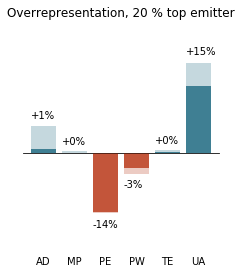

In [13]:
object_type = 'agent_type'

group_folder = 'base_scenario' ## IM *1.2
data_folder = server_data_folder_str+group_folder +'/'
subfolder = [x for x in os.listdir(data_folder) if (x[-5:]!='.pptx')and(x[1]!='.')]
subfolder.sort()
print(subfolder)
#titles = ['0-24 ','25-49', '50-74','75-99']

fig, ax = plt.subplots(1,1,figsize=(3.5,4), sharex=True)


df_list, dict_s, dict_l = get_df_list(subfolder[0], data_folder)
fraction_nr_type_dict = get_fractions_and_numbers_agents_locs(subfolder[0], data_folder,
                                                              with_mixing_loc=True)

frac = 0.2
df = get_df_delta_from_list(df_list, object_type, fraction_nr_type_dict, dict_s, fraction=frac )
plot_delta(ax, df, color_dict=df['positive'].map({True:c[0], False: c[2]}),#vpm_plot.scheduleTypeColors,
           width=0.8, label_offset_y=0.015, pad=100, label_offset_x=-0.01,
           ylim=(-.25,.25), with_std=True, labelrotation=0)
ax.set_title( 'Overrepresentation, '+ str(int(frac*100))+' % top emitter', y=1.1)
ax.set_xlabel('')
#axes[0].text(-3,0, titles[k], rotation=90, verticalalignment='center')

labels_old = [l.get_text() for l in ax.get_xticklabels()]
labels_new  = [label_dict[x] for x in labels_old] 
ax.set_xticklabels(labels_new)
        
        
plt.savefig('output/plots/fig_OUR_'+group_folder+'_schedules.png',  dpi=600, bbox_inches='tight') 
plt.savefig('output/plots/fig_OUR_'+group_folder+'_schedules.svg', bbox_inches='tight')     

In [15]:
product_list = [x for x in scenarios_list if 'product' in x.split('_')]
product_list

['mix_product_0.6', 'product_0.6_scan_inf_0.075_1.200']

In [16]:
title_dict = {'mix': 'homogenous', 'product': 'heterogeneous'}

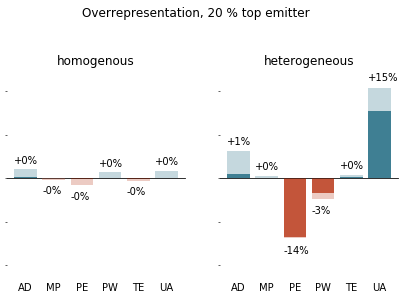

In [17]:
fig, axes = plt.subplots(1,2,figsize=(7,4), sharey=True)
fig.suptitle( 'Overrepresentation, 20 % top emitter', y=1.1)

for k,group_folder in enumerate(product_list):
    data_folder = server_data_folder_str+group_folder +'/'
    subfolder = [x for x in os.listdir(data_folder) if (x[-5:]!='.pptx')and(x[1]!='.')]
    subfolder.sort()
    
    df_list, dict_s, dict_l = get_df_list(subfolder[1], data_folder)
    fraction_nr_type_dict = get_fractions_and_numbers_agents_locs(subfolder[1], data_folder,
                                                                  with_mixing_loc=True)

    frac = 0.2
    df = get_df_delta_from_list(df_list, object_type, fraction_nr_type_dict, dict_s, fraction=frac )
    plot_delta(axes[k], df, color_dict=df['positive'].map({True:c[0], False: c[2]}),#vpm_plot.scheduleTypeColors,
               width=0.8, label_offset_y=0.015, pad=100, label_offset_x=-0.01,
               ylim=(-.25,.25), with_std=True, labelrotation=0)
    axes[k].set_title(title_dict[group_folder.split('_')[0]])
    axes[k].set_xlabel('')
    labels_old = [l.get_text() for l in axes[k].get_xticklabels()]
    labels_new  = [label_dict[x] for x in labels_old] 
    axes[k].set_xticklabels(labels_new)
    
    #plt.tight_layout()

plt.savefig('output/plots/fig_OUR_mix_comp_schedules.png',  dpi=300, bbox_inches='tight') 
plt.savefig('output/plots/fig_OUR_mix_comp_schedules.svg', bbox_inches='tight')      

In [ ]:
labels_old


['parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0', 'parralel_HM_V2_recover_scan_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0', 'parralel_HM_V2_recover_scan_Ifreq_2_no_mitigation_IF03_None_ri_1_rx_0']


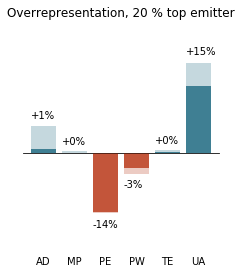

In [11]:
object_type = 'agent_type'

group_folder = 'base_scenario' ## IM *1.2
data_folder = server_data_folder_str+group_folder +'/'
subfolder = [x for x in os.listdir(data_folder) if (x[-5:]!='.pptx')and(x[1]!='.')]
subfolder.sort()
print(subfolder)
#titles = ['0-24 ','25-49', '50-74','75-99']

fig, ax = plt.subplots(1,1,figsize=(3.5,4), sharex=True)


df_list, dict_s, dict_l = get_df_list(subfolder[0], data_folder)
fraction_nr_type_dict = get_fractions_and_numbers_agents_locs(subfolder[0], data_folder,
                                                              with_mixing_loc=True)

frac = 0.2
df = get_df_delta_from_list(df_list, object_type, fraction_nr_type_dict, dict_s, fraction=frac )
plot_delta(ax, df, color_dict=df['positive'].map({True:c[0], False: c[2]}),#vpm_plot.scheduleTypeColors,
           width=0.8, label_offset_y=0.015, pad=100, label_offset_x=-0.01,
           ylim=(-.25,.25), with_std=True, labelrotation=0)
ax.set_title( 'Overrepresentation, '+ str(int(frac*100))+' % top emitter', y=1.1)
ax.set_xlabel('')
#axes[0].text(-3,0, titles[k], rotation=90, verticalalignment='center')

labels_old = [l.get_text() for l in ax.get_xticklabels()]
labels_new  = [label_dict[x] for x in labels_old] 
ax.set_xticklabels(labels_new)
        
        
plt.savefig('output/plots/fig_OUR_'+group_folder+'_schedules.png',  dpi=600, bbox_inches='tight') 
plt.savefig('output/plots/fig_OUR_'+group_folder+'_schedules.svg', bbox_inches='tight')     

In [8]:
subfolder[0]

'parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0'

['parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0', 'parralel_HM_V2_recover_scan_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0', 'parralel_HM_V2_recover_scan_Ifreq_2_no_mitigation_IF03_None_ri_1_rx_0']


AttributeError: 'numpy.ndarray' object has no attribute 'text'

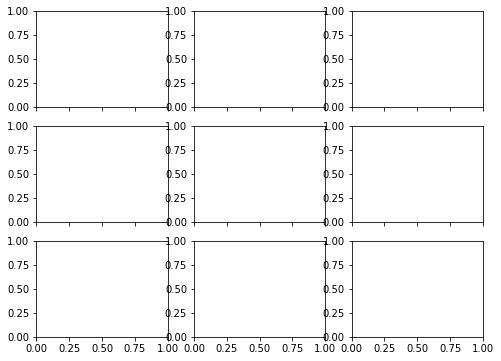

In [6]:
object_type = 'agent_type'

group_folder = 'base_scenario' ## IM *1.2
data_folder = server_data_folder_str+group_folder +'/'
subfolder = [x for x in os.listdir(data_folder) if (x[-5:]!='.pptx')and(x[1]!='.')]
subfolder.sort()
print(subfolder)
#titles = ['0-24 ','25-49', '50-74','75-99']

fig, axes = plt.subplots(len(subfolder),3,figsize=(8,len(subfolder)*2.0), sharex=True)

axes[1].text(0.8,0.6, group_folder,  horizontalalignment='center')

for k,s in enumerate(subfolder):
    df_list, dict_s, dict_l = get_df_list(s, data_folder)
    fraction_nr_type_dict = get_fractions_and_numbers_agents_locs(s, data_folder,
                                                                  with_mixing_loc=True)

    for i,frac in enumerate([0.2,0.5,1.0]):
        df = get_df_delta_from_list(df_list, object_type, fraction_nr_type_dict, dict_s, fraction=frac )
        plot_delta(axes[i], df, color_dict=vpm_plot.scheduleTypeColors,
                   width=0.8, label_offset_y=0.025, pad=50, label_offset_x=-0.01,
                   ylim=(-.25,.35), with_std=True)
        axes[i].set_title(str(int(frac*100))+' % top infectees', y=1.1)
        axes[i].set_xlabel('')
        #axes[0].text(-3,0, titles[k], rotation=90, verticalalignment='center')

    
plt.savefig('output/plots/fig_OUR_'+group_folder+'_schedules.png', bbox_inches='tight') 
plt.savefig('output/plots/fig_OUR_'+group_folder+'_schedules.svg', bbox_inches='tight')     

# Plots
[back to top](#main)

IAR_1.2_0.0_24.0_parralel_HM_V2_Bad_Feilnbach_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0
IAR_1.2_25.0_49.0_parralel_HM_V2_Bad_Feilnbach_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0
IAR_1.2_50.0_74.0_parralel_HM_V2_Bad_Feilnbach_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0
IAR_1.2_75.0_99.0_parralel_HM_V2_Bad_Feilnbach_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0
IAR_1.2_0.0_24.0_parralel_HM_V2_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0
IAR_1.2_25.0_49.0_parralel_HM_V2_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0
IAR_1.2_26.0_49.0_parralel_HM_V2_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0
IAR_1.2_50.0_74.0_parralel_HM_V2_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0
IAR_1.2_75.0_99.0_parralel_HM_V2_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0
mix_parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0
mix_parralel_HM_V2_RPM02_hm_Gangelt_big_no_mitigation_IF03_prod_0.6_inf_1.2_mu_0.500_ri_1_rx_0
parralel_HM_V2_RPM02_hm_Gangelt_bi

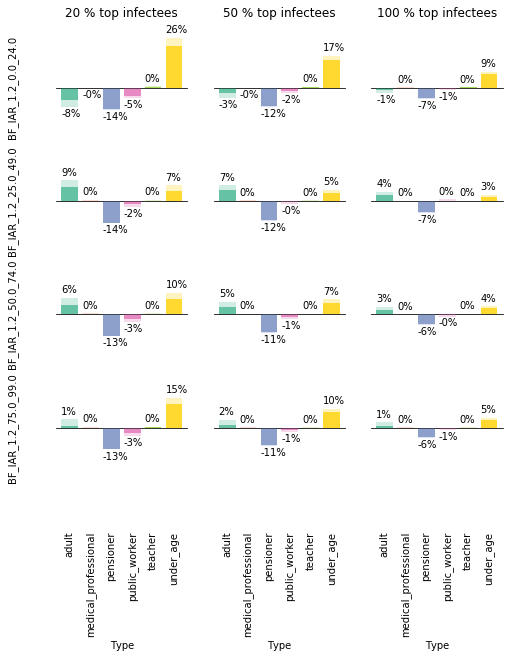

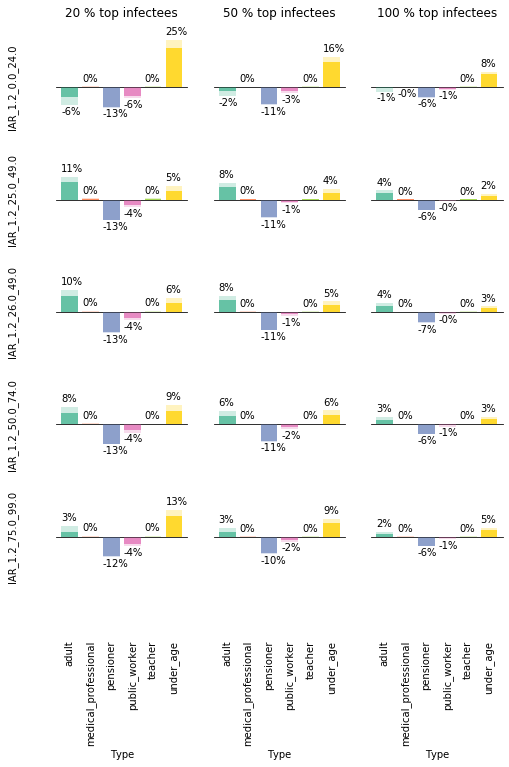

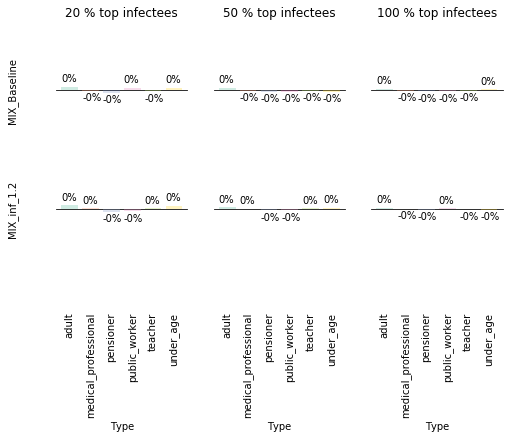

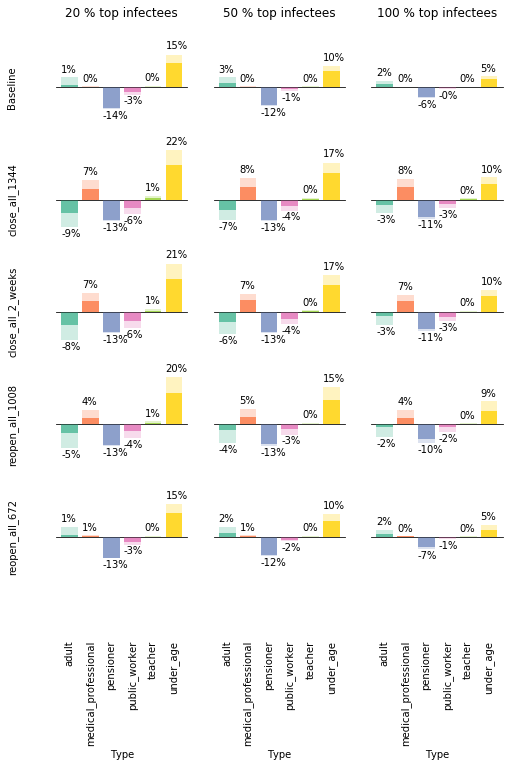

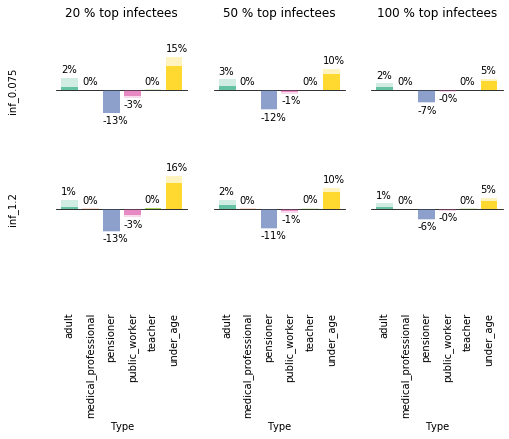

In [361]:
sets = {'BF_IARS':BF_IARS, 'IARS':IARS, 'MIX':MIX, 'REST':REST, 'INF':INF}

for s in sets: 

    fig, axes = plt.subplots(len(sets[s]),3,figsize=(8,len(sets[s])*2.0), sharex=True)
    object_type = 'agent_type'

    for k,scenario in enumerate(sets[s]):

        print(inv_sc_names[scenario])
        df_list, dict_s, dict_l = get_df_list(inv_sc_names[scenario], server_data_folder)
        fraction_nr_type_dict = get_fractions_and_numbers_agents_locs(inv_sc_names[scenario], server_data_folder, with_mixing_loc=True)

        for i,frac in enumerate([0.2,0.5,1.0]):
            df = get_df_delta_from_list(df_list, object_type, fraction_nr_type_dict, dict_s, fraction=frac )
            plot_delta(axes[k][i], df, color_dict=vpm_plot.scheduleTypeColors,
                       width=0.8, label_offset_y=0.03, pad=100, label_offset_x=-0.01,
                       ylim=(-.25,.35), with_std=True)
            axes[0][i].set_title(str(int(frac*100))+' % top infectees', y=1.1)
        axes[k][0].text(-3,0, scenario, rotation=90, verticalalignment='center')

    plt.savefig('output/plots/fig_OUR_'+s+'_schedules.png', bbox_inches='tight') 
    plt.savefig('output/plots/fig_OUR_'+s+'_schedules.svg', bbox_inches='tight')  

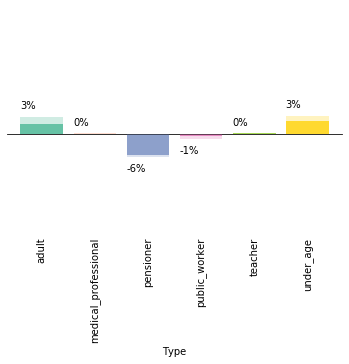

In [362]:
object_type = 'agent_type'

group_folder = 'modified_interaction_frequencies_Gangelt'
data_folder = server_data_folder_str+group_folder +'/'
subfolder = os.listdir(data_folder)
s=subfolder[2]

fig,ax = plt.subplots(1,1)

df_list, dict_s, dict_l = get_df_list(s, data_folder)
fraction_nr_type_dict = get_fractions_and_numbers_agents_locs(s, data_folder,
                                                              with_mixing_loc=True)
df = get_df_delta_from_list(df_list, object_type, fraction_nr_type_dict, dict_s, fraction=frac )
plot_delta(ax, df, color_dict=vpm_plot.scheduleTypeColors,
           width=0.8, label_offset_y=0.020, pad=100, label_offset_x=-0.01,
           ylim=(-.25,.35), with_std=True)


<a id='base'></a>
### Base Scenario
[back to top](#main)

['parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0']


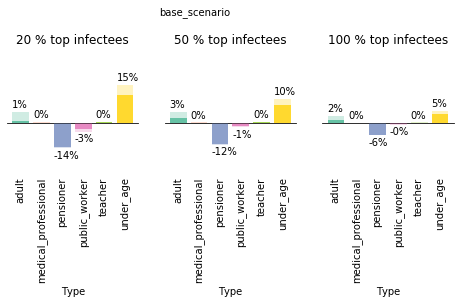

In [363]:
object_type = 'agent_type'

group_folder = 'base_scenario' ## IM *1.2
data_folder = server_data_folder_str+group_folder +'/'
subfolder = os.listdir(data_folder)
subfolder.sort()
print(subfolder)
#titles = ['0-24 ','25-49', '50-74','75-99']

fig, axes = plt.subplots(len(subfolder),3,figsize=(8,len(subfolder)*2.0), sharex=True)

axes[1].text(0.8,0.6, group_folder,  horizontalalignment='center')

for k,s in enumerate(subfolder):
    df_list, dict_s, dict_l = get_df_list(s, data_folder)
    fraction_nr_type_dict = get_fractions_and_numbers_agents_locs(s, data_folder,
                                                                  with_mixing_loc=True)

    for i,frac in enumerate([0.2,0.5,1.0]):
        df = get_df_delta_from_list(df_list, object_type, fraction_nr_type_dict, dict_s, fraction=frac )
        plot_delta(axes[i], df, color_dict=vpm_plot.scheduleTypeColors,
                   width=0.8, label_offset_y=0.025, pad=50, label_offset_x=-0.01,
                   ylim=(-.25,.35), with_std=True)
        axes[i].set_title(str(int(frac*100))+' % top infectees', y=1.1)
        #axes[0].text(-3,0, titles[k], rotation=90, verticalalignment='center')

    
plt.savefig('output/plots/fig_OUR_'+group_folder+'_schedules.png', bbox_inches='tight') 
plt.savefig('output/plots/fig_OUR_'+group_folder+'_schedules.svg', bbox_inches='tight')     

<a id='close_all_336'></a>
### Close All after one week
[back to top](#main)

['parralel_HM_V2_RPM02_hm_Gangelt_big_Ifreq_2_close_all_IF03_None_1.000_ri_1_rx_0']


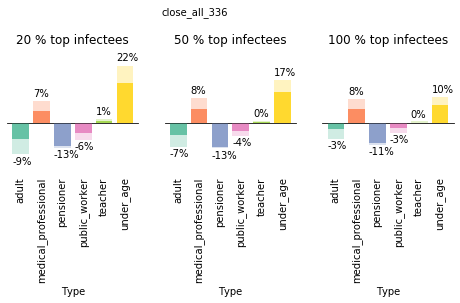

In [364]:
object_type = 'agent_type'

group_folder = 'close_all_336' ## IM *1.2
data_folder = server_data_folder_str+group_folder +'/'
subfolder = os.listdir(data_folder)
subfolder.sort()
print(subfolder)
#titles = ['0-24 ','25-49', '50-74','75-99']

fig, axes = plt.subplots(len(subfolder),3,figsize=(8,len(subfolder)*2.0), sharex=True)

axes[1].text(0.8,0.6, group_folder,  horizontalalignment='center')

for k,s in enumerate(subfolder):
    df_list, dict_s, dict_l = get_df_list(s, data_folder)
    fraction_nr_type_dict = get_fractions_and_numbers_agents_locs(s, data_folder,
                                                                  with_mixing_loc=True)

    for i,frac in enumerate([0.2,0.5,1.0]):
        df = get_df_delta_from_list(df_list, object_type, fraction_nr_type_dict, dict_s, fraction=frac )
        plot_delta(axes[i], df, color_dict=vpm_plot.scheduleTypeColors,
                   width=0.8, label_offset_y=0.025, pad=50, label_offset_x=-0.01,
                   ylim=(-.25,.35), with_std=True)
        axes[i].set_title(str(int(frac*100))+' % top infectees', y=1.1)
        #axes[0].text(-3,0, titles[k], rotation=90, verticalalignment='center')

    
plt.savefig('output/plots/fig_OUR_'+group_folder+'_schedules.png', bbox_inches='tight') 
plt.savefig('output/plots/fig_OUR_'+group_folder+'_schedules.svg', bbox_inches='tight')     

<a id='school_times'></a>
### School time separation
[back to top](#main)

In [365]:
color_dict = vpm_plot.scheduleTypeColors

color_dict['underage_0_6'] = color_dict['under_age']
color_dict['underage_6_12'] = color_dict['under_age']
color_dict['underage_12_18'] = color_dict['under_age']

['parralel_HM_V2_different_school_times_2nd_attempt_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0']


NameError: name 'color_dict' is not defined

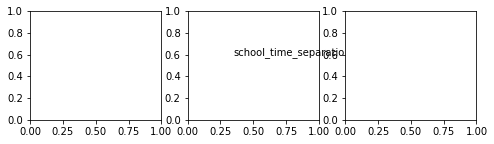

In [12]:
object_type = 'agent_type'

group_folder = 'school_time_separation' ## IM *1.2
data_folder = server_data_folder_str+group_folder +'/'
subfolder = os.listdir(data_folder)
subfolder.sort()
print(subfolder)
#titles = ['0-24 ','25-49', '50-74','75-99']

fig, axes = plt.subplots(len(subfolder),3,figsize=(8,len(subfolder)*2.0), sharex=True)

axes[1].text(0.8,0.6, group_folder,  horizontalalignment='center')

for k,s in enumerate(subfolder):
    df_list, dict_s, dict_l = get_df_list(s, data_folder)
    fraction_nr_type_dict = get_fractions_and_numbers_agents_locs(s, data_folder,
                                                                  with_mixing_loc=True)

    for i,frac in enumerate([0.2,0.5,1.0]):
        df = get_df_delta_from_list(df_list, object_type, fraction_nr_type_dict, dict_s, fraction=frac )
        plot_delta(axes[i], df,
                   color_dict=color_dict,
                   width=0.8, label_offset_y=0.025, pad=50, label_offset_x=-0.01,
                   ylim=(-.25,.35), with_std=True)
        axes[i].set_title(str(int(frac*100))+' % top infectees', y=1.1)
        #axes[0].text(-3,0, titles[k], rotation=90, verticalalignment='center')
        axes[i].set_xlabel('')
    
plt.savefig('output/plots/fig_OUR_'+group_folder+'_schedules.png', bbox_inches='tight') 
plt.savefig('output/plots/fig_OUR_'+group_folder+'_schedules.svg', bbox_inches='tight')     

<a id='HM'></a>
### Homogeneous Mixing
[back to top](#main)

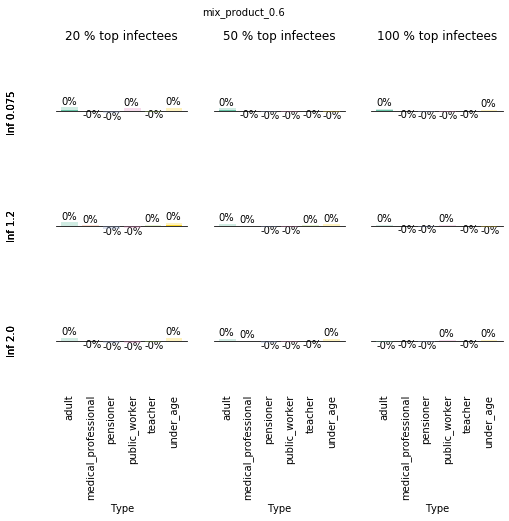

In [375]:
object_type = 'agent_type'

group_folder = 'mix_product_0.6'
data_folder = server_data_folder_str+group_folder +'/'
subfolder = os.listdir(data_folder)

titles = ['Inf 0.075 ','Inf 1.2', 'Inf 2.0']

fig, axes = plt.subplots(len(subfolder),3,figsize=(8,len(subfolder)*2.0), sharex=True)

axes[0][1].text(0.8,0.6, group_folder,  horizontalalignment='center')

for k,s in enumerate(subfolder):
    df_list, dict_s, dict_l = get_df_list(s, data_folder)
    fraction_nr_type_dict = get_fractions_and_numbers_agents_locs(s, data_folder,
                                                                  with_mixing_loc=True)

    for i,frac in enumerate([0.2,0.5,1.0]):
        df = get_df_delta_from_list(df_list, object_type, fraction_nr_type_dict, dict_s, fraction=frac )
        plot_delta(axes[k][i], df, color_dict=vpm_plot.scheduleTypeColors,
                   width=0.8, label_offset_y=0.020, pad=50, label_offset_x=-0.01,
                   ylim=(-.25,.35), with_std=True)
        axes[0][i].set_title(str(int(frac*100))+' % top infectees', y=1.1)
        axes[k][0].text(-3,0, titles[k], rotation=90, verticalalignment='center')

    
plt.savefig('output/plots/fig_OUR_'+group_folder+'_schedules.png', bbox_inches='tight') 
plt.savefig('output/plots/fig_OUR_'+group_folder+'_schedules.svg', bbox_inches='tight')     

<a id='rw0o1'></a>
### Recovered ordered 1 
[back to top](#main)

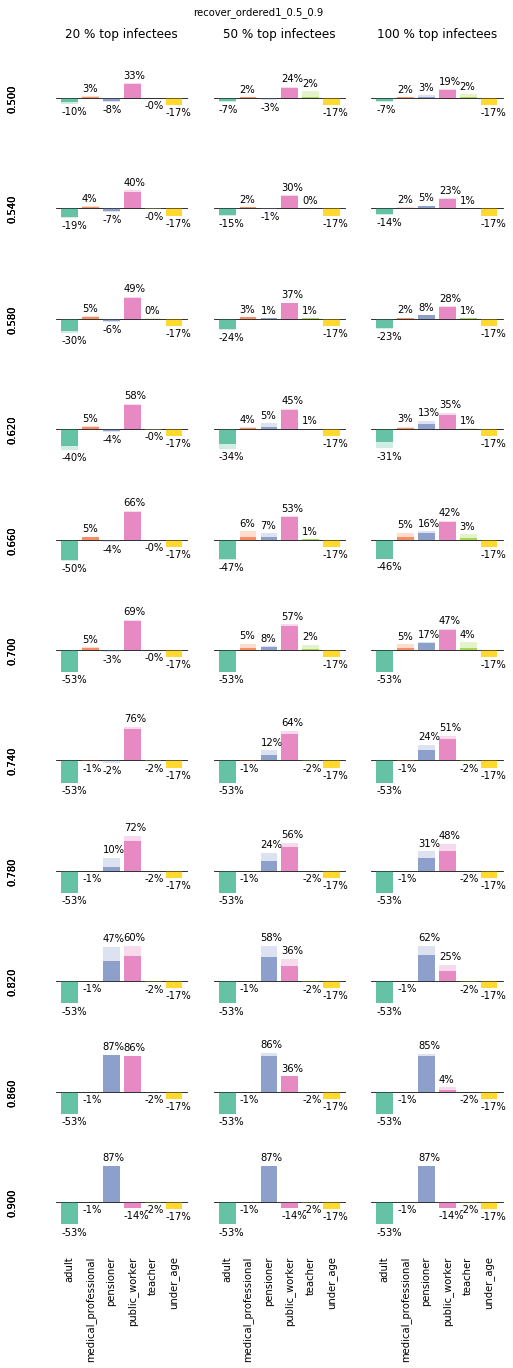

In [376]:
object_type = 'agent_type'

group_folder = 'recover_ordered1_0.5_0.9'
data_folder = server_data_folder_str+group_folder +'/'
subfolder = os.listdir(data_folder)
subfolder.sort()

fig, axes = plt.subplots(len(subfolder),3,figsize=(8,len(subfolder)*2.0), sharex=True)

axes[0][1].text(1.5,2.0, group_folder,  horizontalalignment='center')

for k,s in enumerate(subfolder):
    df_list, dict_s, dict_l = get_df_list(s, data_folder)
    fraction_nr_type_dict = get_fractions_and_numbers_agents_locs(s, data_folder,
                                                                  with_mixing_loc=True)

    for i,frac in enumerate([0.2,0.5,1.0]):
        df = get_df_delta_from_list(df_list, object_type, fraction_nr_type_dict, dict_s, fraction=frac )
        plot_delta(axes[k][i], df, color_dict=vpm_plot.scheduleTypeColors,
                   width=0.8, label_offset_y=0.12, pad=50, label_offset_x=-0.01,
                   ylim=(-1.10,1.10), with_std=True)
        axes[0][i].set_title(str(int(frac*100))+' % top infectees', y=1.1)
        axes[k][0].text(-3,0, s.split('_')[-7], rotation=90, verticalalignment='center')
    
    
plt.savefig('output/plots/fig_OUR_'+group_folder+'_schedules.png', bbox_inches='tight') 
plt.savefig('output/plots/fig_OUR_'+group_folder+'_schedules.svg', bbox_inches='tight')     

<a id='IFS'></a>
### infectivity_scan_0.100_0.500
[back to top](#main)

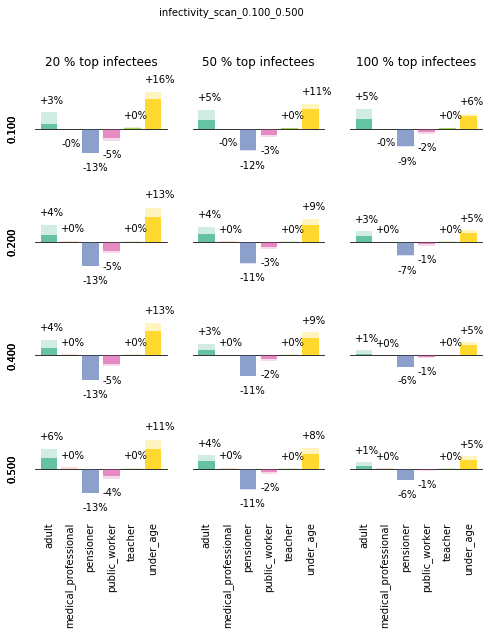

In [14]:
object_type = 'agent_type'

group_folder = 'infectivity_scan_0.100_0.500'
data_folder = server_data_folder_str+group_folder +'/'
subfolder = os.listdir(data_folder)
subfolder.sort()

#titles = ['Inf 0.075 ','Inf 1.2', 'Inf 2.0']

fig, axes = plt.subplots(len(subfolder),3,figsize=(8,len(subfolder)*2.0), sharex=True)

axes[0][1].text(1.2,0.6, group_folder,  horizontalalignment='center')

for k,s in enumerate(subfolder):
    df_list, dict_s, dict_l = get_df_list(s, data_folder)
    fraction_nr_type_dict = get_fractions_and_numbers_agents_locs(s, data_folder,
                                                                  with_mixing_loc=True)

    for i,frac in enumerate([0.2,0.5,1.0]):
        df = get_df_delta_from_list(df_list, object_type, fraction_nr_type_dict, dict_s, fraction=frac )
        plot_delta(axes[k][i], df, color_dict=vpm_plot.scheduleTypeColors,
                   width=0.8, label_offset_y=0.045, pad=50, label_offset_x=-0.01,
                   ylim=(-.25,.25), with_std=True)
        axes[0][i].set_title(str(int(frac*100))+' % top infectees', y=1.1)
        axes[k][0].text(-2,0, s.split('_')[-5], rotation=90, verticalalignment='center')
        axes[k][i].set_xlabel('')

    
plt.savefig('output/plots/fig_OUR_'+group_folder+'_schedules.png', bbox_inches='tight') 
plt.savefig('output/plots/fig_OUR_'+group_folder+'_schedules.svg', bbox_inches='tight')     

<a id='#age_dep_IM_FB'></a>
### modified interaction per age group frequencies Bad_Feilnbach 
[back to top](#main)

['IAR_1.2_0.0_24.0_parralel_HM_V2_Bad_Feilnbach_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0', 'IAR_1.2_25.0_49.0_parralel_HM_V2_Bad_Feilnbach_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0', 'IAR_1.2_50.0_74.0_parralel_HM_V2_Bad_Feilnbach_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0', 'IAR_1.2_75.0_99.0_parralel_HM_V2_Bad_Feilnbach_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0']


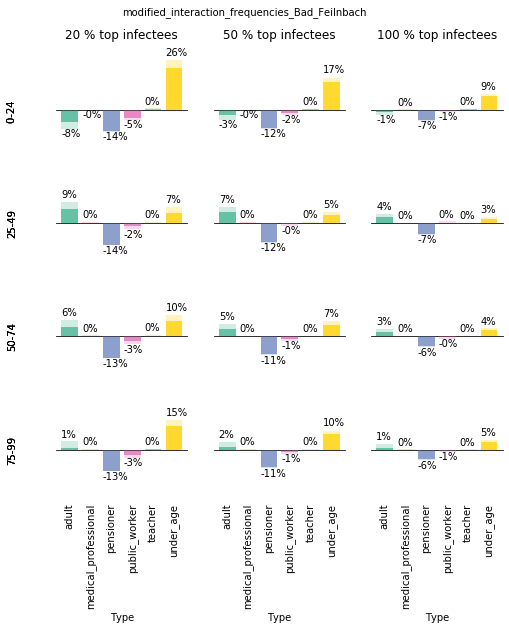

In [378]:
object_type = 'agent_type'

group_folder = 'modified_interaction_frequencies_Bad_Feilnbach' ## IM *1.2
data_folder = server_data_folder_str+group_folder +'/'
subfolder = os.listdir(data_folder)
subfolder.sort()
print(subfolder)
titles = ['0-24 ','25-49', '50-74','75-99']

fig, axes = plt.subplots(len(subfolder),3,figsize=(8,len(subfolder)*2.0), sharex=True)

axes[0][1].text(0.8,0.6, group_folder,  horizontalalignment='center')

for k,s in enumerate(subfolder):
    df_list, dict_s, dict_l = get_df_list(s, data_folder)
    fraction_nr_type_dict = get_fractions_and_numbers_agents_locs(s, data_folder,
                                                                  with_mixing_loc=True)

    for i,frac in enumerate([0.2,0.5,1.0]):
        df = get_df_delta_from_list(df_list, object_type, fraction_nr_type_dict, dict_s, fraction=frac )
        plot_delta(axes[k][i], df, color_dict=vpm_plot.scheduleTypeColors,
                   width=0.8, label_offset_y=0.025, pad=50, label_offset_x=-0.01,
                   ylim=(-.25,.35), with_std=True)
        axes[0][i].set_title(str(int(frac*100))+' % top infectees', y=1.1)
        axes[k][0].text(-3,0, titles[k], rotation=90, verticalalignment='center')

    
plt.savefig('output/plots/fig_OUR_'+group_folder+'_schedules.png', bbox_inches='tight') 
plt.savefig('output/plots/fig_OUR_'+group_folder+'_schedules.svg', bbox_inches='tight')  

<a id='age_dep_IM'></a>
### Age dependent increase of interaction modifier by 1.2 Gangelt
[back to top](#main)

['IAR_1.2_0.0_24.0_parralel_HM_V2_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0', 'IAR_1.2_25.0_49.0_parralel_HM_V2_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0', 'IAR_1.2_50.0_74.0_parralel_HM_V2_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0', 'IAR_1.2_75.0_99.0_parralel_HM_V2_Ifreq_2_no_mitigation_IF03_None_1.000_ri_1_rx_0']


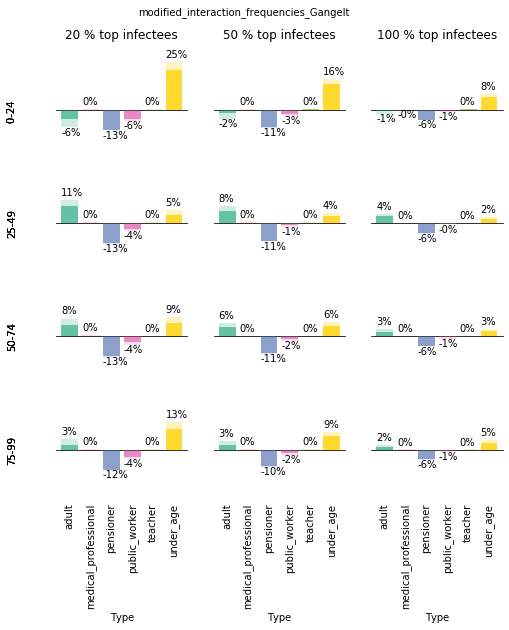

In [379]:
object_type = 'agent_type'

group_folder = 'modified_interaction_frequencies_Gangelt' ## IM *1.2
data_folder = server_data_folder_str+group_folder +'/'
subfolder = os.listdir(data_folder)
subfolder.sort()
print(subfolder)
titles = ['0-24 ','25-49', '50-74','75-99']

fig, axes = plt.subplots(len(subfolder),3,figsize=(8,len(subfolder)*2.0), sharex=True)

axes[0][1].text(0.8,0.6, group_folder,  horizontalalignment='center')

for k,s in enumerate(subfolder):
    df_list, dict_s, dict_l = get_df_list(s, data_folder)
    fraction_nr_type_dict = get_fractions_and_numbers_agents_locs(s, data_folder,
                                                                  with_mixing_loc=True)

    for i,frac in enumerate([0.2,0.5,1.0]):
        df = get_df_delta_from_list(df_list, object_type, fraction_nr_type_dict, dict_s, fraction=frac )
        plot_delta(axes[k][i], df, color_dict=vpm_plot.scheduleTypeColors,
                   width=0.8, label_offset_y=0.025, pad=50, label_offset_x=-0.01,
                   ylim=(-.25,.35), with_std=True)
        axes[0][i].set_title(str(int(frac*100))+' % top infectees', y=1.1)
        axes[k][0].text(-3,0, titles[k], rotation=90, verticalalignment='center')

    
plt.savefig('output/plots/fig_OUR_'+group_folder+'_schedules.png', bbox_inches='tight') 
plt.savefig('output/plots/fig_OUR_'+group_folder+'_schedules.svg', bbox_inches='tight')     